# Mapping Short-Term Rental Patterns and Housing Pressure Signals in Cape Town

**Purpose:**  
This notebook provides a preliminary preview of the raw Airbnb datasets (listings, calendar, and neighbourhoods) for Cape Town.  
It checks shapes, columns, missing values, and basic structure to ensure datasets are loaded correctly.

## Import required libraries

In [1]:
# Import libraries
import sys
sys.path.append("..") # Move up project root to import config
import os
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting (for Jupyter)
%matplotlib inline

# Import config file
import config

## Define helper functions

In [2]:
# Helper function to load files
def load_csv(path, compression=None, name="Dataset"):
    """ Load CSV with optional compression and display message."""
    if os.path.exists(path):
        df = pd.read_csv(path, compression=compression)
        if df.empty:
            print(f"{name} loaded but is empty.")
        else:
            print(f"{name} loaded successfully.")
        return df
    else:
        print(f"{name} not found: {path}")
        return None

    
# Helper function to check for missing values and duplicate rows
def check_missing_and_duplicates(df, name="Dataset"):

    # Missing data
    missing_values = df.isnull().sum().reset_index()
    missing_values.columns = ["Column", "Missing Values"]
    missing_values["% Missing"] = (
    missing_values["Missing Values"] / len(df) * 100
    ).round(2)
    
    if missing_values["Missing Values"].sum() == 0:
        print(f"\nNo missing data in {name}.")
    else:
        print(f"\nMissing data in {name}:")
        print(missing_values[missing_values["Missing Values"] > 0])
    
    # Duplicates
    duplicate_count = df.duplicated().sum()
    if duplicate_count == 0:
        print(f"\nNo duplicate rows in {name}.")
    else:
        print(f"\n{duplicate_count} duplicate rows found in {name}.")


## Load the datasets

In [3]:
# Define path to the dataset
filepath_listings = config.LISTINGS_FILE
filepath_calendar = config.CALENDAR_FILE
filepath_gdf = config.GDF_FILE

# Load listings
listings_df = load_csv(filepath_listings, name="Listings")

# Load calendar
calendar_df = load_csv(filepath_calendar, compression="gzip", name="Calendar")

# Load neighbourhoods
wards_gdf = gpd.read_file(filepath_gdf)

Listings loaded successfully.
Calendar loaded successfully.


In [4]:
# Preview shapes and columns in each dataset
print("Listings shape:", listings_df.shape)
print("Listings columns:", listings_df.columns.tolist())

print("Calendar shape:", calendar_df.shape)
print("Calendar columns:", calendar_df.columns.tolist())

print("Neighbourhoods shape:", wards_gdf.shape)
print("Neighbourhoods columns:", wards_gdf.columns.tolist())

Listings shape: (26877, 18)
Listings columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
Calendar shape: (9810109, 7)
Calendar columns: ['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']
Neighbourhoods shape: (116, 3)
Neighbourhoods columns: ['neighbourhood', 'neighbourhood_group', 'geometry']


## Preliminary dataset exploration
### Listing dataset

In [5]:
# Preview listings dataset
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15007.0,Blaauwberg House on the beach in Bloubergstrand,59072,Dirk,NaN,Ward 23,-33.800010,18.460630,Entire home/apt,2315.0,2,47,19-10-2024,0.33,1,230,1,NaN
1,15068.0,Grande Bay,59318,Linda,NaN,Ward 23,-33.788260,18.459400,Entire home/apt,4785.0,4,0,NaN,NaN,5,264,0,NaN
2,15077.0,Relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.858356,18.490376,Private room,1118.0,2,7,16-06-2022,0.05,6,314,0,NaN
3,15199.0,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.911150,18.412350,Entire home/apt,2250.0,14,2,15-04-2016,0.01,1,365,0,NaN
4,15354.0,"Aurora Self Catering Units, Durbanville, Cape ...",60196,Ian,NaN,Ward 112,-33.830740,18.631420,Entire home/apt,NaN,3,0,NaN,NaN,1,0,0,NaN


In [6]:
# Basic info about listings dataset
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26877 entries, 0 to 26876
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26877 non-null  float64
 1   name                            26876 non-null  object 
 2   host_id                         26877 non-null  int64  
 3   host_name                       26871 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26877 non-null  object 
 6   latitude                        26877 non-null  float64
 7   longitude                       26877 non-null  float64
 8   room_type                       26877 non-null  object 
 9   price                           22476 non-null  float64
 10  minimum_nights                  26877 non-null  int64  
 11  number_of_reviews               26877 non-null  int64  
 12  last_review                     

In [7]:
# Check for missing data
check_missing_and_duplicates(listings_df, name="Listings")


Missing data in Listings:
                 Column  Missing Values  % Missing
1                  name               1       0.00
3             host_name               6       0.02
4   neighbourhood_group           26877     100.00
9                 price            4401      16.37
12          last_review            6124      22.79
13    reviews_per_month            6124      22.79
17              license           26748      99.52

No duplicate rows in Listings.


In [8]:
# Basic descriptive statistics
listings_df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.687700e+04,2.687700e+04,0.0,26877.000000,26877.000000,22476.000000,26877.000000,26877.000000,20753.000000,26877.000000,26877.000000,26877.00000
mean,7.010873e+17,2.253725e+08,NaN,-33.954672,18.472992,3280.999778,4.501618,24.719165,0.861893,12.691930,204.592068,6.34483
std,5.826912e+17,2.190787e+08,NaN,0.098098,0.124027,9048.338102,21.764125,48.541829,1.034017,28.609671,124.557137,10.87634
min,1.500700e+04,2.528600e+04,NaN,-34.262840,18.320200,161.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.00000
25%,3.809275e+07,3.865032e+07,NaN,-34.014110,18.401230,950.000000,1.000000,1.000000,0.170000,1.000000,90.000000,0.00000
50%,8.500090e+17,1.314201e+08,NaN,-33.926913,18.426327,1526.000000,2.000000,6.000000,0.500000,2.000000,236.000000,2.00000
75%,1.262130e+18,4.152172e+08,NaN,-33.909730,18.483460,2975.250000,3.000000,26.000000,1.150000,8.000000,316.000000,8.00000
max,1.519110e+18,7.209347e+08,NaN,-33.485066,18.937458,714885.000000,999.000000,843.000000,23.420000,175.000000,365.000000,303.00000


**Observations and insights**
- The dataset contains 26,877 listings with 18 columns, with information on pricing, location, reviews, and availability.
- Key columns such as neighbourhood, room_type, and availability_365 have no missing values.
- Columns like neighbourhood_group (100% missing values) and license (~99.5% missing values) are not essential for analysis, so they can be dropped.
- Price has significant missing values (~16%) and needs imputation.

### Calendar dataset

In [9]:
# Basic info about calendar dataset
calendar_df.info()

# Check for missing data
check_missing_and_duplicates(calendar_df, name="Calendar")

# Preview dataset
calendar_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9810109 entries, 0 to 9810108
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 523.9+ MB

Missing data in Calendar:
           Column  Missing Values  % Missing
3           price         9810109      100.0
4  adjusted_price         9810109      100.0

No duplicate rows in Calendar.


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5295177,2025-09-29,f,NaN,NaN,1,365
1,5295177,2025-09-30,f,NaN,NaN,1,365
2,5295177,2025-10-01,t,NaN,NaN,1,365
3,5295177,2025-10-02,t,NaN,NaN,1,365
4,5295177,2025-10-03,t,NaN,NaN,1,365


### Neighbourhoods dataset

In [10]:
# Basic info about neighbourhoods dataset
wards_gdf.info()

# Check for missing data
check_missing_and_duplicates(wards_gdf, name="Neighbourhoods")

# Preview dataset
wards_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        116 non-null    object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             116 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 2.8+ KB

Missing data in Neighbourhoods:
                Column  Missing Values  % Missing
1  neighbourhood_group             116      100.0

No duplicate rows in Neighbourhoods.


,neighbourhood,neighbourhood_group,geometry
0,Ward 86,None,"MULTIPOLYGON (((18.87634 -34.11744, 18.87253 -..."
1,Ward 94,None,"MULTIPOLYGON (((18.68509 -34.04336, 18.68503 -..."
2,Ward 85,None,"MULTIPOLYGON (((18.85646 -34.10521, 18.85672 -..."
3,Ward 98,None,"MULTIPOLYGON (((18.68398 -34.0547, 18.68422 -3..."
4,Ward 83,None,"MULTIPOLYGON (((18.85646 -34.10521, 18.85623 -..."


- Neighbourhood group column can be dropped as it has 100 % missing data.

## Preliminary overview

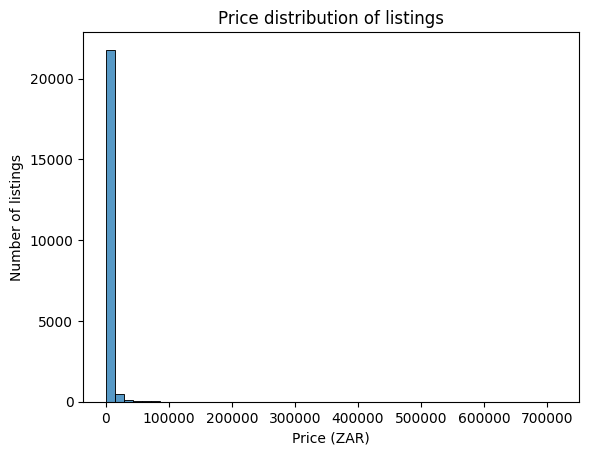

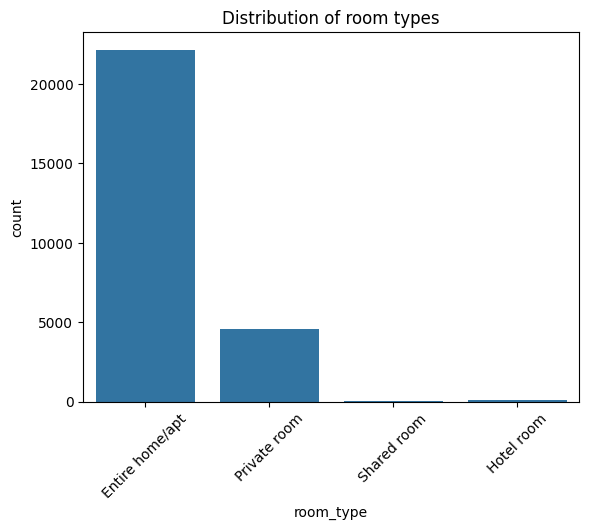

In [11]:
# Histogram of price
sns.histplot(listings_df['price'].dropna(), bins=50, kde=False)
plt.title("Price distribution of listings")
plt.xlabel("Price (ZAR)")
plt.ylabel("Number of listings")
plt.show()

# Count plot for room_type
sns.countplot(data=listings_df, x='room_type')
plt.title("Distribution of room types")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Preview unique categories
print("Unique room types:", listings_df['room_type'].unique())

# Preview first 10
print("Unique neighbourhoods:", listings_df['neighbourhood'].unique()[:10]) 

Unique room types: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
Unique neighbourhoods: ['Ward 23' 'Ward 4' 'Ward 115' 'Ward 112' 'Ward 54' 'Ward 59' 'Ward 2'
 'Ward 77' 'Ward 103' 'Ward 5']


**Next Steps**
- Clean and preprocess listings and calendar datasets
- Conduct exploratory data analysis (EDA) with visualizations
- Aggregate and analyze data by neighbourhoods